# Perceptron

## Lab Assignment - Vehicle Mileage Prediction

Classify vehicle mileage as high or low based on two features, weight and horsepower using Perceptron model.

Perform classification with the following functions.

#### 1. Plot the scatter of weight vs horsepower. The vehicles with high mileage should be in blue color and low should be in red color. Give appropriate legends. 
#### 2. Split the data set into training and testing data set. Use the train_test_split function to get a 80:20 split, using random_state
##### 3. Plot a bar chart of number of 1's and 0's in the training dataset. 
#### 4. Use the perceptron model to classify the data, and get predictions for test dataset.
#### 5. Obtain the confusion matrix of the output.
#### 6. Plot the separating hyperplane on the training dataset.
#### 7. Get the classification result for the values of weight 2, 3.3, 1.21, 5.32, 1.23, 4.8 and horsepower 20, 29, 13, 100, 40, 49 respectively. 

### Split the dataset with 80:20 ratio, but with random_state 299. Get the output of steps 3, 4, 5, 6. What is the difference from the previous output?

### Perform KFold cross validation for k=3 to 6 for this dataset.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from io import StringIO
dataset =StringIO('''       
weight,horsepower,mileage
1.4,43,1
1.5,8,0
2.71,44,1
3.55,23,0
2.5,15,0
2.9,19,0
3.85,112,1
3.96,87,1
4.62,108,1
4.7,21,0
2.67,34,1
2.5,20,0
1.932,12, 0
4.8,48,1
1.321,32,1
1.9013,52,1
4.13,19,0
2.8,29,0
''')
df = pd.read_csv(dataset)
df

,weight,horsepower,mileage
0,1.4000,43,1
1,1.5000,8,0
2,2.7100,44,1
3,3.5500,23,0
4,2.5000,15,0
5,2.9000,19,0
6,3.8500,112,1
7,3.9600,87,1
8,4.6200,108,1
9,4.7000,21,0


    weight  horsepower  mileage
0   1.4000          43        1
2   2.7100          44        1
6   3.8500         112        1
7   3.9600          87        1
8   4.6200         108        1
10  2.6700          34        1
13  4.8000          48        1
14  1.3210          32        1
15  1.9013          52        1
    weight  horsepower  mileage
1    1.500           8        0
3    3.550          23        0
4    2.500          15        0
5    2.900          19        0
9    4.700          21        0
11   2.500          20        0
12   1.932          12        0
16   4.130          19        0
17   2.800          29        0


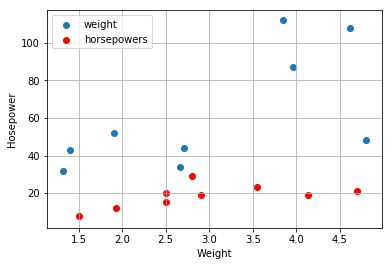

In [7]:
#Q1
import numpy as np
import matplotlib.pyplot as plt 
import pandas as pd

weights     = df[df["mileage"]==1]
horsepowers = df[df["mileage"]==0]
print(weights)
print(horsepowers)

plt.scatter(weights["weight"],
        weights['horsepower'],
           label='weight')
plt.scatter(horsepowers["weight"],
            horsepowers['horsepower'],
           color='r',label='horsepowers')
#plt.figure(figsize=[12,6])
plt.xlabel("Weight")
plt.ylabel("Hosepower")
plt.legend(loc=2)
plt.axis()
plt.grid(True)

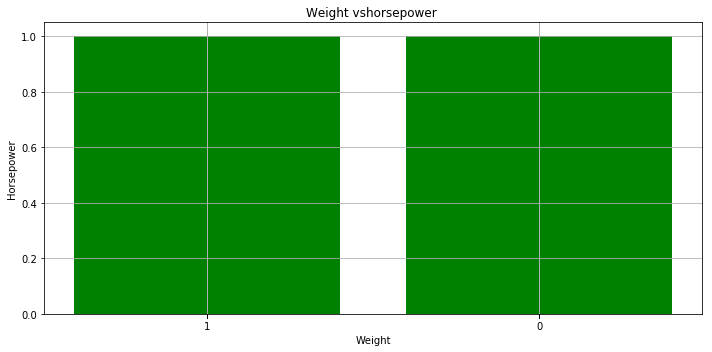

In [8]:
#Q2
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(df[['weight','horsepower']],df['mileage'],test_size=0.2,random_state=3)
#other arguments - random_state=none,shuffle=True
# print(PSize_train)
# print(PSize_test)
# print(PPrice_train)
# print(PPrice_test)

plt.figure(figsize=[10,5])
plt.title("Weight vshorsepower ")
plt.xlabel("Weight")
plt.ylabel("Horsepower")
plt.xticks(df['mileage'],['0','1'])
plt.bar(y_train,color='g',label='green',height=1,align='center')
plt.axis()
plt.grid(True)
plt.tight_layout()

# y_train.value_counts().plot(kind='bar',color='g')
# plt.grid(True)

# 4. Use the perceptron model to classify the data, and get predictions for test dataset.

In [9]:
from sklearn.linear_model import Perceptron
new_c = Perceptron(max_iter=1000)
model = new_c.fit(x_train,y_train)

predictions = model.predict(x_test)
print("Obtained prediction",predictions)
print("Actual prediction",y_test.tolist())

Obtained prediction [0 0 0 1]
Actual prediction [0, 1, 0, 1]


In [4]:
df.shape

(18, 3)

# 5. Obtain the confusion matrix of the output.

In [5]:
from sklearn import metrics
metrics.confusion_matrix(y_test,predictions)

array([[2, 0],
       [1, 1]], dtype=int64)

#  6 Plot the separating hyperplane on the training dataset.

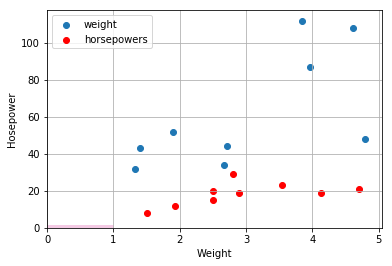

In [10]:
import numpy as np

x_min,x_max = 0,1
y_min,y_max = 0,1

xx,yy = np.meshgrid(np.arange(x_min,x_max,0.001),
                    np.arange(y_min,y_max,0.001))

# print(xx)
# print(yy)

xx_lin = xx.ravel()
# print(xx_lin)
yy_lin = yy.ravel()
# print(yy_lin)

pred_input= np.c_[xx_lin,yy_lin]
# print(pred_input)

Z=model.predict(pred_input)
# print(Z)

Z=Z.reshape(xx.shape)
# print(Z)
#contourf fills the area ,it requires  2d array
plt.contourf(xx,yy,Z,cmap=plt.cm.Pastel2)

plt.scatter(weights['weight'],
        weights['horsepower'],
           label='weight')
plt.scatter(horsepowers['weight'],
            horsepowers['horsepower'],
           color='r',label='horsepowers')
#plt.figure(figsize=[12,6])
plt.xlabel('Weight')
plt.ylabel('Hosepower')
plt.legend(loc=2)
plt.axis()
plt.grid(True)

# 7. Get the classification result for the values of weight 2, 3.3, 1.21, 5.32, 1.23, 4.8 and horsepower 20, 29, 13, 100, 40, 49 respectively. 


In [11]:
print(model.predict([[2,20]]))
print(model.predict([[3.3,29]]))
print(model.predict([[1.21,13],[5.32,100],[1.23,40],[4.8,49]]))

[0]
[0]
[0 1 1 0]
